In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from numpy.linalg import inv
import pandas as pd
import pysindy as ps
import random
import seaborn as sns

%matplotlib inline
plt.rcParams["font.family"] = 'Arial'

In [2]:
df = pd.read_csv('dataset/dataset_different_loading.csv')
df_norm = (df - df.mean()) / df.std()
df

,Contact_length,Lifting_load,Maximum_Mises_stress,Maximum_displacement
0,55,0.010,43,51
1,55,0.025,75,127
2,55,0.050,184,353
3,55,0.080,227,522
4,55,0.100,260,717
5,45,0.010,51,68
6,45,0.025,86,157
7,45,0.050,245,385
8,45,0.080,257,550
9,45,0.100,348,805


[None, None]

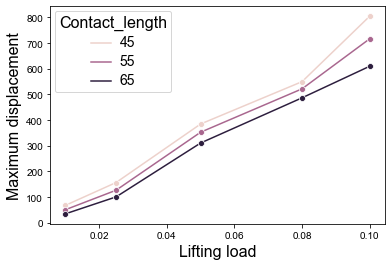

In [3]:
fig = plt.figure()
ax = sns.lineplot(data=df, x='Lifting_load', y='Maximum_displacement', hue='Contact_length', marker='o')
plt.xlabel('Lifting load', fontsize=16)
plt.ylabel('Maximum displacement', fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='16')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_train, df_test = train_test_split(df_norm, test_size=0.1, random_state=2)
X_train, y_train = df_train[['Contact_length', 'Lifting_load']], df_train[['Maximum_Mises_stress', 'Maximum_displacement']]
X_test, y_test = df_test[['Contact_length', 'Lifting_load']], df_test[['Maximum_Mises_stress', 'Maximum_displacement']]

regr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

pred_test = regr.predict(X_test)

r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print(X_train.shape, y_train.shape)
print(r2_train, r2_test)
print(X_test, '\n', pred_test)
print(y_test)

(13, 2) (13, 2)
0.9724966904665868 0.9639964308325308
    Contact_length  Lifting_load
11        1.183216     -0.809738
4         0.000000      1.359202 
 [[-0.92491006 -0.90675578]
 [ 1.28007307  1.29821931]]
    Maximum_Mises_stress  Maximum_displacement
11             -1.096101             -0.980213
4               0.954112              1.426049


In [5]:
X_target_list = []

for i in range(45, 65):
    X_target_list.append([(i - df.mean()[0]) / df.std()[0], 0.1])

X_target = np.array(X_target_list)
pred_X_target = regr.predict(X_target)
pred_y_target = pred_X_target * df.std()[2:].to_numpy() + df.mean()[2:].to_numpy()

Text(0, 0.5, 'Maximum_Mises_stress')

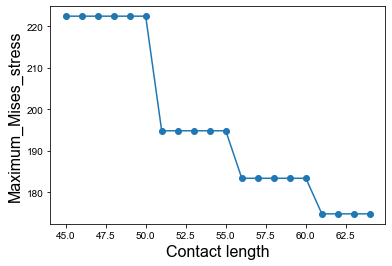

In [8]:
fig = plt.figure()
plt.plot(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target[:,0])
plt.scatter(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target[:,0])
plt.xlabel('Contact length', fontsize=16)
plt.ylabel('Maximum_Mises_stress', fontsize=16)

Text(0, 0.5, 'Maximum_displacement')

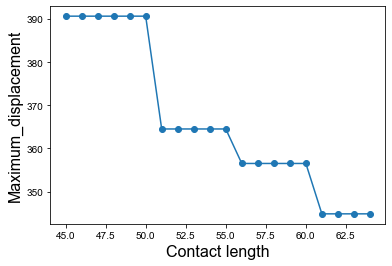

In [7]:
fig = plt.figure()
plt.plot(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target[:,1])
plt.scatter(X_target[:,0] * df.std()[0] + df.mean()[0], pred_y_target[:,1])
plt.xlabel('Contact length', fontsize=16)
plt.ylabel('Maximum_displacement', fontsize=16)

In [9]:
df.describe()

,Contact_length,Lifting_load,Maximum_Mises_stress,Maximum_displacement
count,15.000000,15.000000,15.000000,15.000000
mean,55.000000,0.053000,164.133333,351.933333
std,8.451543,0.034579,100.477337,255.998735
min,45.000000,0.010000,34.000000,35.000000
25%,45.000000,0.025000,64.500000,114.000000
50%,55.000000,0.050000,184.000000,353.000000
75%,65.000000,0.080000,242.500000,536.000000
max,65.000000,0.100000,348.000000,805.000000
